In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import csv

In [101]:
moisture_data = pd.read_csv('moisture.csv', parse_dates=['Date'])
temperature_data = pd.read_csv('temparature.csv', parse_dates=['Date'])
diameter_data = pd.read_csv('diameter.csv', parse_dates=['Date'])

C:\Users\supereme\AppData\Local\Temp\ipykernel_9568\4005889284.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  diameter_data = pd.read_csv('diameter.csv', parse_dates=['Date'])


In [102]:
moisture_data

,Date,I0,I3,I5
0,2022-03-29,16.36,16.45,15.79
1,2022-03-30,16.05,9.14,11.53
2,2022-03-31,17.65,5.73,7.03
3,2022-04-01,17.68,2.68,4.83
4,2022-04-02,16.09,17.96,3.32
...,...,...,...,...
335,NaT,NaN,NaN,NaN
336,NaT,NaN,NaN,NaN
337,NaT,NaN,NaN,NaN
338,NaT,NaN,NaN,NaN


In [103]:
moisture_data.isnull().sum()

Date    266
I0      266
I3      266
I5      266
dtype: int64

In [104]:
moisture_data.dropna()

,Date,I0,I3,I5
0,2022-03-29,16.36,16.45,15.79
1,2022-03-30,16.05,9.14,11.53
2,2022-03-31,17.65,5.73,7.03
3,2022-04-01,17.68,2.68,4.83
4,2022-04-02,16.09,17.96,3.32
...,...,...,...,...
69,2022-06-06,16.09,8.88,1.68
70,2022-06-07,14.52,4.92,17.23
71,2022-06-08,14.22,2.18,9.70
72,2022-06-09,16.40,17.02,6.80


In [105]:
moisture_data.describe()

,Date,I0,I3,I5
count,74,74.000000,74.000000,74.000000
mean,2022-05-04 12:00:00,16.379459,8.334459,7.692703
min,2022-03-29 00:00:00,14.220000,1.650000,1.100000
25%,2022-04-16 06:00:00,16.000000,4.430000,3.410000
50%,2022-05-04 12:00:00,16.350000,7.500000,6.530000
75%,2022-05-22 18:00:00,16.750000,13.540000,10.502500
max,2022-06-10 00:00:00,19.250000,18.550000,19.160000
std,NaN,0.924974,5.645475,5.493382


In [106]:
temperature_data.head()

,Date,I0,I3,I5
0,2022-03-29,31.55,30.60,31.87
1,2022-03-30,31.05,31.03,32.27
2,2022-03-31,31.10,31.23,32.10
3,2022-04-01,31.70,31.03,32.23
4,2022-04-02,30.45,30.53,32.67


In [107]:
temperature_data.isnull().sum()

Date    0
I0      0
I3      0
I5      0
dtype: int64

In [108]:
temperature_data.describe()

,Date,I0,I3,I5
count,74,74.000000,74.000000,74.000000
mean,2022-05-04 12:00:00,31.468919,31.613919,32.190000
min,2022-03-29 00:00:00,29.700000,30.470000,31.030000
25%,2022-04-16 06:00:00,31.100000,31.070000,31.877500
50%,2022-05-04 12:00:00,31.550000,31.600000,32.170000
75%,2022-05-22 18:00:00,31.787500,32.070000,32.530000
max,2022-06-10 00:00:00,32.850000,33.000000,33.170000
std,NaN,0.647159,0.669244,0.552099


In [109]:
diameter_data.head()

,Date,I0,I3,I5
0,2022-03-31,5.02,4.93,4.96
1,2022-04-18,5.80,5.56,5.43
2,2022-04-29,6.66,6.31,6.06
3,2022-05-17,7.44,6.49,6.38
4,2022-05-30,8.20,6.91,6.61


In [110]:
diameter_data.isnull().sum()

Date    0
I0      0
I3      0
I5      0
dtype: int64

In [111]:
diameter_data.describe()

,Date,I0,I3,I5
count,6,6.000000,6.000000,6.000000
mean,2022-05-07 12:00:00,7.025000,6.256667,6.068333
min,2022-03-31 00:00:00,5.020000,4.930000,4.960000
25%,2022-04-20 18:00:00,6.015000,5.747500,5.587500
50%,2022-05-08 00:00:00,7.050000,6.400000,6.220000
75%,2022-05-26 18:00:00,8.010000,6.805000,6.552500
max,2022-06-10 00:00:00,9.030000,7.340000,6.970000
std,NaN,1.498449,0.883531,0.753589


In [112]:
moisture_data.columns

Index(['Date', 'I0', 'I3', 'I5'], dtype='object')

In [113]:
# Merge the datasets
moisture_data.columns = ['Date','Moisture_I0', 'Moisture_I3', 'Moisture_I5']
temperature_data.columns = ['Date','Temp_I0', 'Temp_I3', 'Temp_I5' ]
diameter_data.columns = ['Date', 'Diameter_I0', 'Diameter_I3', 'Diameter_I5']

merged_data = pd.merge(moisture_data, temperature_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, diameter_data, on='Date', how='inner')

In [114]:
merged_data.head(3)

,Date,Moisture_I0,Moisture_I3,Moisture_I5,Temp_I0,Temp_I3,Temp_I5,Diameter_I0,Diameter_I3,Diameter_I5
0,2022-03-31,17.65,5.73,7.03,31.10,31.23,32.10,5.02,4.93,4.96
1,2022-04-18,16.71,18.12,6.53,32.65,31.27,31.53,5.80,5.56,5.43
2,2022-04-29,16.91,1.98,6.26,29.70,31.20,31.03,6.66,6.31,6.06


In [115]:
# Feature engineering
merged_data['DayOfYear'] = merged_data['Date'].dt.dayofyear

In [116]:
['I0','I3','I5']

['I0', 'I3', 'I5']

In [117]:
# Reshape data for ML
data_list = []
for i in ['I0', 'I3', 'I5']:
    merged_df = merged_data[['Moisture_' + i, 'Temp_' + i, 'Diameter_' + i, 'DayOfYear']].copy()
    merged_df.columns = ['Moisture', 'Temperature', 'Diameter', 'DayOfYear']
    merged_df['IrrigationLevel'] = i
    data_list.append(merged_df)

final_data = pd.concat(data_list, axis=0)

In [118]:
final_data.head()

,Moisture,Temperature,Diameter,DayOfYear,IrrigationLevel
0,17.65,31.10,5.02,90,I0
1,16.71,32.65,5.80,108,I0
2,16.91,29.70,6.66,119,I0
3,15.64,32.50,7.44,137,I0
4,17.36,32.10,8.20,150,I0


# Add new column "DaysAfterSeed"

In [119]:
final_data["DaysAfterSeed"] = final_data["DayOfYear"] - 62
final_data.drop(columns=["DayOfYear"], inplace=True)


In [120]:
final_data

,Moisture,Temperature,Diameter,IrrigationLevel,DaysAfterSeed
0,17.65,31.10,5.02,I0,28
1,16.71,32.65,5.80,I0,46
2,16.91,29.70,6.66,I0,57
3,15.64,32.50,7.44,I0,75
4,17.36,32.10,8.20,I0,88
5,16.58,31.55,9.03,I0,99
0,5.73,31.23,4.93,I3,28
1,18.12,31.27,5.56,I3,46
2,1.98,31.20,6.31,I3,57
3,8.53,32.07,6.49,I3,75


In [121]:
final_data

,Moisture,Temperature,Diameter,IrrigationLevel,DaysAfterSeed
0,17.65,31.10,5.02,I0,28
1,16.71,32.65,5.80,I0,46
2,16.91,29.70,6.66,I0,57
3,15.64,32.50,7.44,I0,75
4,17.36,32.10,8.20,I0,88
5,16.58,31.55,9.03,I0,99
0,5.73,31.23,4.93,I3,28
1,18.12,31.27,5.56,I3,46
2,1.98,31.20,6.31,I3,57
3,8.53,32.07,6.49,I3,75


In [122]:
final_data


,Moisture,Temperature,Diameter,IrrigationLevel,DaysAfterSeed
0,17.65,31.10,5.02,I0,28
1,16.71,32.65,5.80,I0,46
2,16.91,29.70,6.66,I0,57
3,15.64,32.50,7.44,I0,75
4,17.36,32.10,8.20,I0,88
5,16.58,31.55,9.03,I0,99
0,5.73,31.23,4.93,I3,28
1,18.12,31.27,5.56,I3,46
2,1.98,31.20,6.31,I3,57
3,8.53,32.07,6.49,I3,75


In [123]:
# Separate features and target
X = final_data[['Moisture', 'Temperature', 'DaysAfterSeed', 'IrrigationLevel']]
y = final_data['Diameter']


In [124]:
# Encode categorical data
X = pd.get_dummies(X, columns=['IrrigationLevel'])

In [125]:
X

,Moisture,Temperature,DaysAfterSeed,IrrigationLevel_I0,IrrigationLevel_I3,IrrigationLevel_I5
0,17.65,31.10,28,True,False,False
1,16.71,32.65,46,True,False,False
2,16.91,29.70,57,True,False,False
3,15.64,32.50,75,True,False,False
4,17.36,32.10,88,True,False,False
5,16.58,31.55,99,True,False,False
0,5.73,31.23,28,False,True,False
1,18.12,31.27,46,False,True,False
2,1.98,31.20,57,False,True,False
3,8.53,32.07,75,False,True,False


In [126]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train

,Moisture,Temperature,DaysAfterSeed,IrrigationLevel_I0,IrrigationLevel_I3,IrrigationLevel_I5
3,15.64,32.50,75,True,False,False
1,6.53,31.53,46,False,False,True
4,17.42,32.53,88,False,False,True
3,1.58,31.87,75,False,False,True
5,9.25,31.60,99,False,True,False
2,16.91,29.70,57,True,False,False
3,8.53,32.07,75,False,True,False
5,4.47,32.10,99,False,False,True
4,17.36,32.10,88,True,False,False
0,7.03,32.10,28,False,False,True


In [128]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_train_scaled

array([[ 1.01173602,  1.12423057,  0.30805141,  1.91485422, -0.74535599,
        -0.8660254 ],
       [-0.6177224 , -0.238899  , -0.93025426, -0.52223297, -0.74535599,
         1.15470054],
       [ 1.33011538,  1.16638922,  0.86315395, -0.52223297, -0.74535599,
         1.15470054],
       [-1.5031032 ,  0.238899  ,  0.30805141, -0.52223297, -0.74535599,
         1.15470054],
       [-0.13121011, -0.14052882,  1.3328561 , -0.52223297,  1.34164079,
        -0.8660254 ],
       [ 1.23889433, -2.81057643, -0.46055211,  1.91485422, -0.74535599,
        -0.8660254 ],
       [-0.25999278,  0.51995664,  0.30805141, -0.52223297,  1.34164079,
        -0.8660254 ],
       [-0.9861839 ,  0.56211529,  1.3328561 , -0.52223297, -0.74535599,
         1.15470054],
       [ 1.31938349,  0.56211529,  0.86315395,  1.91485422, -0.74535599,
        -0.8660254 ],
       [-0.52828999,  0.56211529, -1.69885778, -0.52223297, -0.74535599,
         1.15470054],
       [ 1.45532075, -0.60427393, -0.93025426, -0.

In [130]:
# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

In [131]:
# Train and evaluate models
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, mae, mse, r2])

    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  R-Squared (R2): {r2}")
    print()


Model: Linear Regression
  Mean Absolute Error (MAE): 0.7490697205433368
  Mean Squared Error (MSE): 0.6149796612837033
  R-Squared (R2): 0.7300056365783324

Model: Random Forest
  Mean Absolute Error (MAE): 0.49310000000000076
  Mean Squared Error (MSE): 0.5883156400000031
  R-Squared (R2): 0.7417119350235964

Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.4689097055581195
  Mean Squared Error (MSE): 0.3051006987358595
  R-Squared (R2): 0.8660517182588697



In [132]:
# Save results to CSV
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'R2'])
results_df.to_csv('model_evaluation_results.csv', index=False)

In [133]:
results_df

,Model,MAE,MSE,R2
0,Linear Regression,0.74907,0.614980,0.730006
1,Random Forest,0.49310,0.588316,0.741712
2,Gradient Boosting,0.46891,0.305101,0.866052


In [134]:
# Select the best model (based on R²)
best_model_name = results_df.sort_values(by='R2', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
print(f"The best model is: {best_model_name}")

The best model is: Gradient Boosting


In [135]:
# Predict using the best model for sample data
sample_data = pd.DataFrame({
    'Moisture': [16.0, 15.8],
    'Temperature': [31.5, 32.1],
    'DaysAfterSeed': [10, 11],
    'IrrigationLevel_I0': [0, 1],
    'IrrigationLevel_I3': [0, 1],
    'IrrigationLevel_I5': [1, 0]
})


In [136]:
# Scale the sample data
sample_scaled = scaler.transform(sample_data)

In [137]:
sample_scaled

array([[ 1.07612735, -0.28105764, -2.4674613 , -0.52223297, -0.74535599,
         1.15470054],
       [ 1.04035439,  0.56211529, -2.4247611 ,  1.91485422,  1.34164079,
        -0.8660254 ]])

In [138]:
# Predict
sample_predictions = best_model.predict(sample_scaled)
sample_data['Predicted_Diameter'] = sample_predictions

In [139]:
sample_data

,Moisture,Temperature,DaysAfterSeed,IrrigationLevel_I0,IrrigationLevel_I3,IrrigationLevel_I5,Predicted_Diameter
0,16.0,31.5,10,0,0,1,5.028327
1,15.8,32.1,11,1,1,0,5.056942


In [140]:
def calculate_accuracy(y_true, y_pred):
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return accuracy


# Predicting with the test data
y_test_pred = best_model.predict(X_test_scaled)

# Calculate accuracy in percentage
accuracy_percentage = calculate_accuracy(y_test, y_test_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy_percentage:.2f}%")



Model Accuracy: 93.25%


In [141]:
Z = final_data[['Moisture', 'Temperature', 'Diameter', 'IrrigationLevel']]
Z = pd.get_dummies(Z, columns=['IrrigationLevel'])

In [142]:
Z


,Moisture,Temperature,Diameter,IrrigationLevel_I0,IrrigationLevel_I3,IrrigationLevel_I5
0,17.65,31.10,5.02,True,False,False
1,16.71,32.65,5.80,True,False,False
2,16.91,29.70,6.66,True,False,False
3,15.64,32.50,7.44,True,False,False
4,17.36,32.10,8.20,True,False,False
5,16.58,31.55,9.03,True,False,False
0,5.73,31.23,4.93,False,True,False
1,18.12,31.27,5.56,False,True,False
2,1.98,31.20,6.31,False,True,False
3,8.53,32.07,6.49,False,True,False


Correlation Matrix:
                    Moisture  Temperature  Diameter  IrrigationLevel_I0  \
Moisture            1.000000    -0.016885  0.234772            0.723867   
Temperature        -0.016885     1.000000  0.178334           -0.085154   
Diameter            0.234772     0.178334  1.000000            0.375966   
IrrigationLevel_I0  0.723867    -0.085154  0.375966            1.000000   
IrrigationLevel_I3 -0.309946    -0.095373 -0.126412           -0.500000   
IrrigationLevel_I5 -0.413921     0.180527 -0.249554           -0.500000   

                    IrrigationLevel_I3  IrrigationLevel_I5  
Moisture                     -0.309946           -0.413921  
Temperature                  -0.095373            0.180527  
Diameter                     -0.126412           -0.249554  
IrrigationLevel_I0           -0.500000           -0.500000  
IrrigationLevel_I3            1.000000           -0.500000  
IrrigationLevel_I5           -0.500000            1.000000  


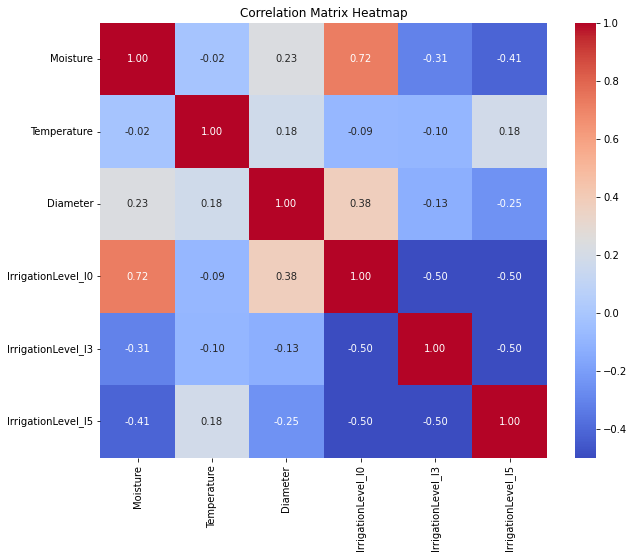

In [143]:


# Calculate the correlation matrix for the selected features
correlation_matrix = Z.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Plot the correlation matrix as a heatmap (requires seaborn library)
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")

# Save the heatmap as a PNG file
plt.savefig("correlation_matrix_heatmap.png", dpi=300, bbox_inches="tight")

# Show the heatmap
plt.show()
